# MNIST data simple CNN

## Load libraries

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2022-11-10 14:18:46.999841: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

Text(0.5, 1.0, 'corresponding label is 5')

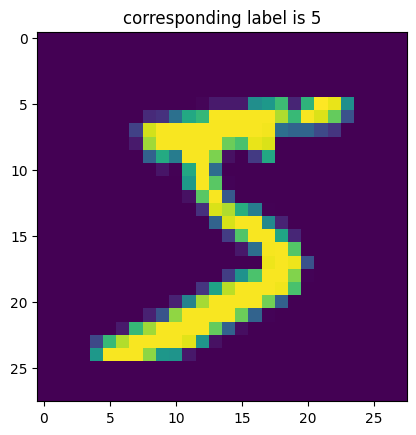

In [5]:
plt.imshow(x_train[0])
plt.title("corresponding label is " + str(y_train[0]))

## Preprocess data

In [6]:
def preprocess_data(image):
    image = image / 255
    image = image[..., np.newaxis] ## to create dummy color channels 
    return(image)

In [7]:
x_train_scaled = preprocess_data(x_train)
x_test_scaled = preprocess_data(x_test)

## Build a simple CNN model

The model architecture follows the ones used by Coursera course "Getting started with TensorFlow 2" week2 assignment

* The model should use the input_shape in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the input_shape keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.


In [8]:
def get_model(input_shape):
    model = tf.keras.models.Sequential(
    [ 
        layers.Input(shape = input_shape),
        layers.Conv2D(filters = 8, kernel_size = (3,3), padding="same", activation = "relu"),
        layers.MaxPool2D(2),
        layers.Flatten(),
        layers.Dense(64, activation = "relu"),
        layers.Dense(64, activation = "relu"),
        layers.Dense(10, activation = "softmax")
        
    ])
    return model

In [9]:
model = get_model(x_train_scaled[0].shape)

2022-11-10 14:18:53.323595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                100416    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

In [11]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

## Fit model and check performance

In [12]:
history = model.fit(x_train_scaled,y_train, epochs=5, validation_split= 0.1)

Epoch 1/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2597 - acc: 0.9219 - val_loss: 0.1074 - val_acc: 0.9685
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0926 - acc: 0.9718 - val_loss: 0.0712 - val_acc: 0.9782
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0601 - acc: 0.9810 - val_loss: 0.0744 - val_acc: 0.9777
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0441 - acc: 0.9861 - val_loss: 0.0582 - val_acc: 0.9847
Epoch 5/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0324 - acc: 0.9895 - val_loss: 0.0611 - val_acc: 0.9835


In [13]:
history.history

{'loss': [0.259738951921463,
  0.09256015717983246,
  0.060137998312711716,
  0.04414026811718941,
  0.032419659197330475],
 'acc': [0.9218888878822327,
  0.9717962741851807,
  0.9809629917144775,
  0.9860925674438477,
  0.9894629716873169],
 'val_loss': [0.10739497095346451,
  0.07115744799375534,
  0.07441739737987518,
  0.058213282376527786,
  0.06107879802584648],
 'val_acc': [0.968500018119812,
  0.9781666398048401,
  0.9776666760444641,
  0.984666645526886,
  0.9835000038146973]}

In [14]:
history_df = pd.DataFrame(history.history)

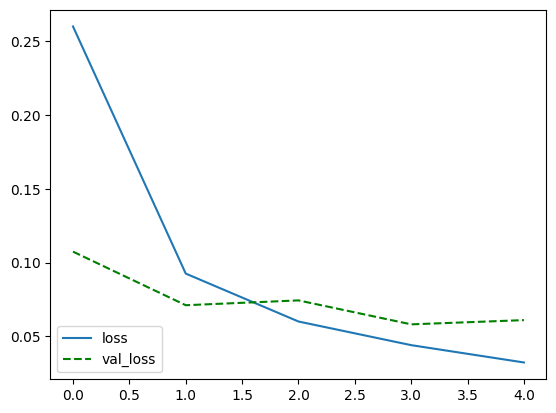

In [15]:
plt.plot(history_df.index, history_df["loss"], label = "loss")
plt.plot(history_df.index, history_df["val_loss"], linestyle='--', color = "green", label = "val_loss")
plt.legend(loc='lower left')

In [16]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0544 - acc: 0.9838


In [17]:
test_loss

0.05440870299935341

In [18]:
test_accuracy

0.9837999939918518

In [19]:
prediction = model.predict(x_test_scaled)

313/313 [==============================] - 1s 2ms/step


In [20]:
prediction_index = np.argmax(prediction, axis = 1)

In [21]:
wrong_sample_indices = [i for i,v in enumerate(prediction_index) if prediction_index[i]!=y_test[i]]

In [22]:
len(wrong_sample_indices)

162

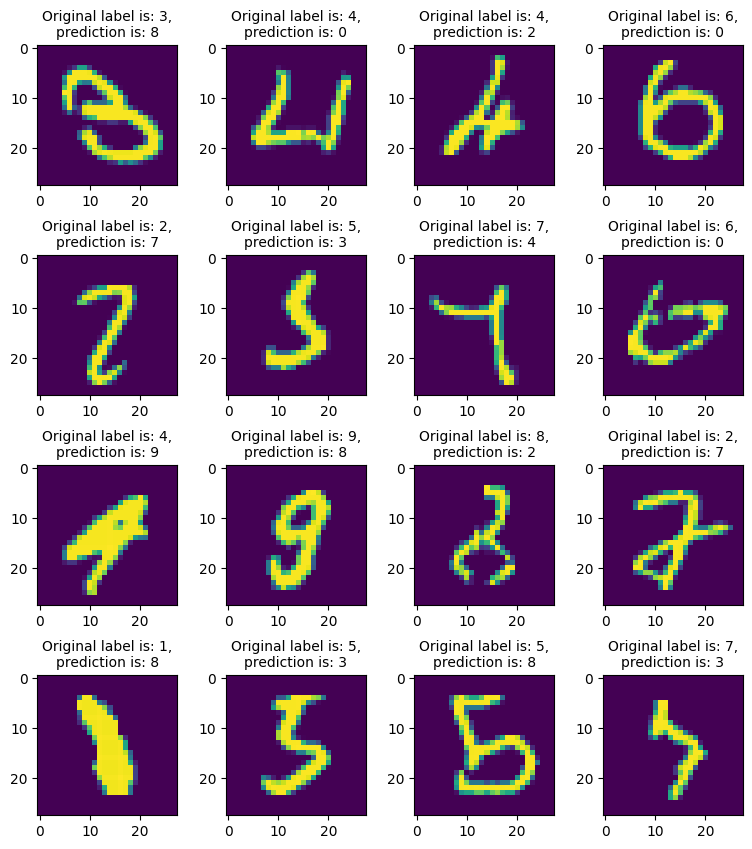

In [23]:
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, wspace=-0.1)
for index in range(16):
    image = x_test[wrong_sample_indices[index]]
    original_label = str(y_test[wrong_sample_indices[index]])
    predicted_label = str(prediction_index[wrong_sample_indices[index]])
    axes[index//4, index % 4].imshow(image)
    axes[index//4, index % 4].set_title("Original label is: " + original_label + ",\nprediction is: " + predicted_label, fontdict = {"fontsize":10}) 